# Wind Statistics

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [117]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [118]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',10)
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [119]:
#data = np.loadtxt("wind.data", skiprows=2)
data = pd.read_csv("wind.data", sep='\s+')
data.drop(columns=data.columns[data.columns.str.contains("Unnamed:")], inplace=True)
print(data.shape)
data.head(20)

(6574, 15)


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,61,1,16,16.42,11.25,15.67,4.71,11.34,6.92,9.25,8.79,8.21,7.33,13.04,9.04
16,61,1,17,17.75,14.37,17.33,10.13,13.96,13.37,13.42,11.04,8.71,11.38,15.92,16.08
17,61,1,18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
18,61,1,19,4.92,3.42,7.29,1.04,3.67,3.17,3.71,2.79,1.92,2.71,6.87,7.83


In [120]:
data.dtypes

Yr       int64
Mo       int64
Dy       int64
RPT    float64
VAL    float64
        ...   
CLA    float64
MUL    float64
CLO    float64
BEL    float64
MAL    float64
Length: 15, dtype: object

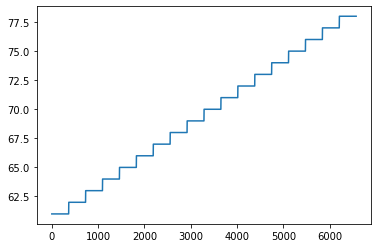

In [121]:
# Is the year always in one and only one century ?
plt.plot(np.arange(data.shape[0]), data['Yr'])
plt.gcf().patch.set_facecolor('white')

In [122]:
# -> Yes, therefore, let's supose it's the XXth century:
data['Yr'] = data['Yr']+1900

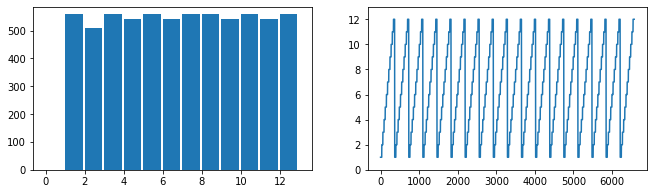

In [123]:
# How is the month column filled ?
fig, axs = plt.subplots(1,2)
axs[0].hist(data['Mo'], bins=range(0,14), width=0.9)
axs[1].plot(range(data.shape[0]), data['Mo'])
axs[1].set(ylim=(0,13))
plt.gcf().patch.set_facecolor('white')
fig.set_size_inches(11,3)

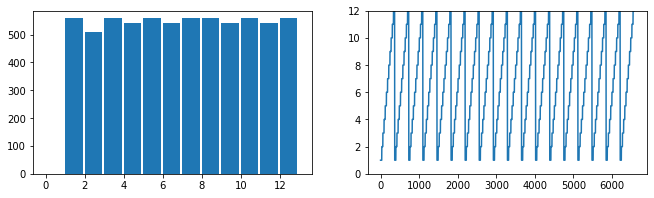

In [124]:
# Let's fill the months

an = 31*[1]+28*[2]+31*[3]+30*[4]+31*[5]+30*[6]+31*[7]+31*[8]+30*[9]+31*[10]+30*[11]+31*[12]
an_b = 31*[1]+29*[2]+31*[3]+30*[4]+31*[5]+30*[6]+31*[7]+31*[8]+30*[9]+31*[10]+30*[11]+31*[12]
biss = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996]
tab_months = []
for y in range(1961,1979):
    if y in biss:
        tab_months += an_b
    else:
        tab_months += an
len(tab_months)
data['Mo'] = tab_months

fig, axs = plt.subplots(1,2)
axs[0].hist(data['Mo'], bins=range(0,14), width=0.9)
axs[1].plot(range(data.shape[0]), data['Mo'].interpolate('linear'))
axs[1].set(ylim=(0,12))
plt.gcf().patch.set_facecolor('white')
fig.set_size_inches(11,3)


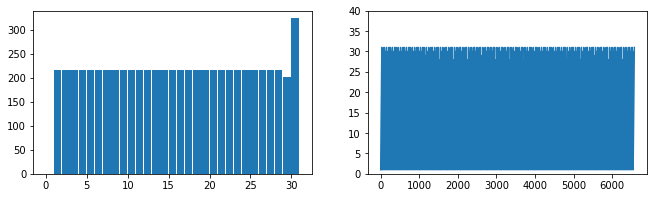

In [125]:
# How is the day column filled ?
fig, axs = plt.subplots(1,2)
axs[0].hist(data['Dy'], bins=range(0,32), width=0.9)
axs[1].plot(range(data.shape[0]), data['Dy'])
axs[1].set(ylim=(0,40))
plt.gcf().patch.set_facecolor('white')
fig.set_size_inches(11,3)

In [126]:
# Let's fill the days
m_31 = list(range(1,32))
m_30 = list(range(1,31))
m_29 = list(range(1,30))
m_28 = list(range(1,29))
days = m_31+m_28+m_31+m_30+m_31+m_30+m_31+m_31+m_30+m_31+m_30+m_31
days_b = m_31+m_29+m_31+m_30+m_31+m_30+m_31+m_31+m_30+m_31+m_30+m_31
biss = [1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996]
tab_days = []
for y in range(1961,1979):
    if y in biss:
        tab_days += days_b
    else:
        tab_days += days
len(tab_days)
data['Dy'] = tab_days

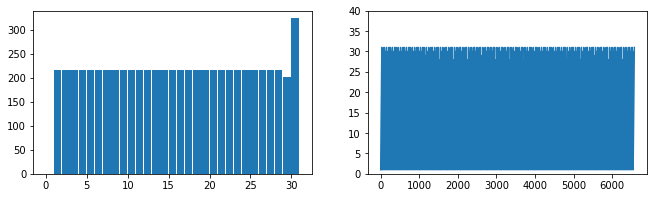

In [127]:
fig, axs = plt.subplots(1,2)
axs[0].hist(data['Dy'], bins=range(0,32), width=0.9)
axs[1].plot(range(data.shape[0]), data['Dy'])
axs[1].set(ylim=(0,40))
plt.gcf().patch.set_facecolor('white')
fig.set_size_inches(11,3)

In [128]:
data.dtypes

Yr       int64
Mo       int64
Dy       int64
RPT    float64
VAL    float64
        ...   
CLA    float64
MUL    float64
CLO    float64
BEL    float64
MAL    float64
Length: 15, dtype: object

In [129]:
data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}, inplace=True)
data.index = pd.to_datetime(data[['year', 'month', 'day']])
data.tail(2)

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1978-12-30,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79
1978-12-31,1978,12,31,20.33,17.41,27.29,9.59,12.08,10.13,19.25,11.63,11.58,11.38,12.08,22.08


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [130]:
data['year'].unique()
# I don't seem to have this problem...

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978], dtype=int64)

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [131]:
# Already done

### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

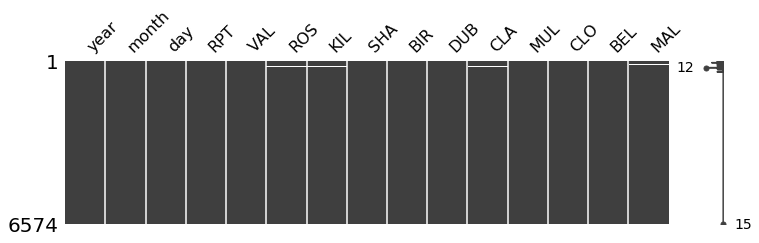

In [132]:
import missingno as msno
msno.matrix(data)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.set_size_inches(12,3)

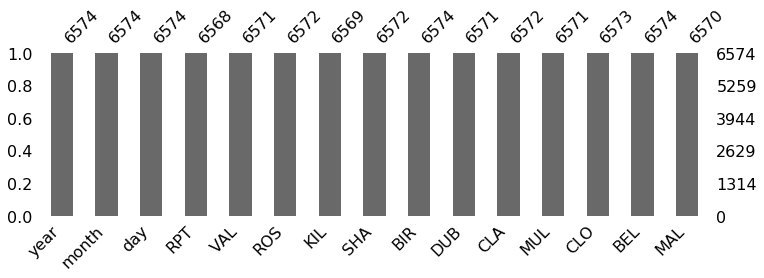

In [133]:
msno.bar(data)
fig = plt.gcf()
fig.patch.set_facecolor('white')
fig.set_size_inches(12,3)

In [134]:
data.isna().sum()

year     0
month    0
day      0
RPT      6
VAL      3
        ..
CLA      2
MUL      3
CLO      1
BEL      0
MAL      4
Length: 15, dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [135]:
filled = data.iloc[:,3:].notna().sum().sum()
missing = data.iloc[:,3:].isna().sum().sum()
total = data.iloc[:,3:].shape[0]*data.iloc[:,3:].shape[1]
print(filled, missing, total, total==(missing+filled))

78857 31 78888 True


### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [136]:
# Solution 1
print(data.iloc[:,3:].agg(np.sum).agg(np.sum)/filled)

# Solution 2
print(data.iloc[:,3:].stack().agg(np.mean))

10.227883764282167
10.22788376428219


### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [39]:
loc_stats = data.iloc[:,3:].describe().loc[['min', 'max', 'mean', 'std']]
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.330000,0.080000,0.000000,0.250000,0.000000,0.040000,0.580000,NaN,NaN,NaN,NaN
max,35.800000,37.540000,31.080000,42.380000,37.990000,35.500000,34.080000,26.250000,NaN,NaN,NaN,NaN
mean,12.415559,10.106519,9.175468,10.897985,9.439496,8.548127,8.168874,9.240346,NaN,NaN,NaN,NaN
std,5.229848,4.953028,5.175858,6.676379,5.788945,5.315896,4.968116,3.623705,NaN,NaN,NaN,NaN


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [137]:
# Solution 1
day_stats = data.iloc[:,3:].agg(['min', 'max', 'mean', 'std'], axis=1) # 10.3 s ± 1.04 s
day_stats

,min,max,mean,std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [138]:
# Solution 2
day_stats = data.iloc[:,3:].T.describe().loc[['min', 'max', 'mean', 'std']] # 20.6 s ± 798 ms
day_stats

,1961-01-01 00:00:00,1961-01-02 00:00:00,1961-01-03 00:00:00,1961-01-04 00:00:00,1961-01-05 00:00:00,1961-01-06 00:00:00,1961-01-07 00:00:00,1961-01-08 00:00:00,1961-01-09 00:00:00,1961-01-10 00:00:00,...,1978-12-22 00:00:00,1978-12-23 00:00:00,1978-12-24 00:00:00,1978-12-25 00:00:00,1978-12-26 00:00:00,1978-12-27 00:00:00,1978-12-28 00:00:00,1978-12-29 00:00:00,1978-12-30 00:00:00,1978-12-31 00:00:00
min,9.290000,6.500000,6.170000,1.790000,6.170000,4.420000,4.960000,5.910000,4.750000,6.54000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
max,18.500000,17.540000,18.500000,11.750000,13.330000,13.210000,14.290000,16.620000,15.370000,19.50000,...,13.080000,22.210000,31.710000,13.960000,13.830000,40.080000,41.460000,29.580000,28.790000,27.290000
mean,13.018182,11.336364,11.641818,6.619167,10.630000,8.240000,10.385000,10.487500,9.897500,10.47750,...,7.000833,15.613333,10.823333,5.729167,6.523333,16.708333,15.150000,14.890000,15.367500,15.402500
std,2.808875,3.188994,3.681912,3.198126,2.445356,2.998063,3.072114,3.547237,2.905954,3.44261,...,3.237337,3.850840,7.195039,3.583263,4.304510,7.868076,9.687857,5.756836,5.540437,5.702483


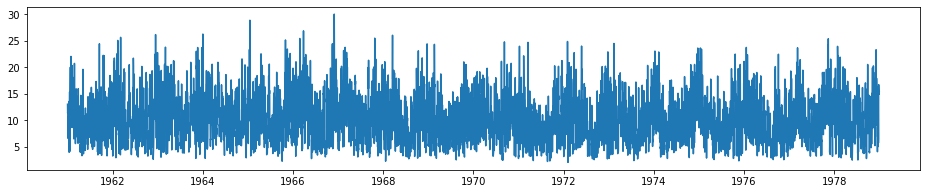

In [139]:
plt.plot(day_stats.T.index, day_stats.T['mean'])
plt.gcf().set_facecolor('w')
plt.gcf().set_size_inches(16,3)

### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [140]:
data[data['month']==1].iloc[:,3:].agg(np.mean).to_frame().rename(columns={0:'mean'}).T

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,14.847325,12.91456,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.55052,18.028763


### Step 12. Downsample the record to a yearly frequency for each location.

In [153]:
# Solution 1
data.groupby('year').mean().iloc[:,2:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
year,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956


In [151]:
# Solution 2
data.reset_index().groupby(pd.Grouper(key='index', freq='Y')).mean().iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
index,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956


In [150]:
# Solution 3
data.resample('A').mean().iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956


In [156]:
# Solution 4
data.groupby(data.index.to_period('Y')).mean().iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956


### Step 13. Downsample the record to a monthly frequency for each location.

In [145]:
# Solution 1
data.groupby(['year', 'month']).mean()

day        RPT        VAL        ROS       KIL        SHA  \
year month                                                               
1961 1      16.0  14.841333  11.988333  13.431613  7.736774  11.072759   
     2      14.5  16.269286  14.975357  14.441481  9.230741  13.852143   
     3      16.0  10.890000  11.296452  10.752903  7.284000  10.509355   
     4      15.5  10.722667   9.427667   9.998000  5.830667   8.435000   
     5      16.0   9.860968   8.850000  10.818065  5.905333   9.490323   
...          ...        ...        ...        ...       ...        ...   
1978 8      16.0   9.645161   8.259355   9.032258  4.502903   7.368065   
     9      15.5  10.913667  10.895000  10.635000  5.725000  10.372000   
     10     16.0   9.897742   8.670968   9.295806  4.721290   8.525161   
     11     15.5  16.151667  14.802667  13.508000  7.317333  11.475000   
     12     16.0  16.175484  13.748065  15.635161  7.094839  11.398710   

                  BIR        DUB        CLA        MUL        CLO        BEL  \
year month                                                                     
1961 1       8.588065  11.184839   9.245333   9.085806  10.107419  13.880968   
     2      10.937500  11.890714  11.846071  11.821429  12.714286  18.583214   
     3       8.866774   9.644194   9.829677  10.294138  11.251935  16.410968   
     4       6.495000   6.925333   7.094667   7.342333   7.237000  11.147333   
     5       6.574839   7.604000   8.177097   8.039355   8.499355  11.900323   
...               ...        ...        ...        ...        ...        ...   
1978 8       5.935161   5.650323   5.417742   7.241290   5.536774  10.466774   
     9       9.278333  10.790333   9.583000  10.069333   8.939000  15.680333   
     10      6.774194   8.115484   7.337742   8.297742   8.243871  13.776774   
     11      8.743000  11.492333   9.657333  10.701333  10.676000  17.404667   
     12      9.241613  12.077419  10.194839  10.616774  11.028710  13.859677   

                  MAL  
year month             
1961 1      14.703226  
     2      15.411786  
     3      15.720000  
     4      10.278333  
     5      12.011613  
...               ...  
1978 8      12.054194  
     9      19.391333  
     10     17.150000  
     11     20.723000  
     12     21.371613  

[216 rows x 13 columns]

In [146]:
# Solution 2
data.resample('M').mean().head(2)

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,1961.0,1.0,16.0,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,1961.0,2.0,14.5,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786


### Step 14. Downsample the record to a weekly frequency for each location.

In [178]:
data.resample('W').agg(np.mean).iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571


In [168]:
data.reset_index().groupby(pd.Grouper(key='index', freq='W')).mean().iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
index,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571


In [160]:
# Solution 3
data.groupby(data.index.to_period('W')).mean().iloc[:,3:].head(2)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [180]:
df_W = data.resample('W', loffset='1D').mean().iloc[:,3:].agg([np.min, np.mean, np.max],axis=1)
df_W.T.iloc[:,0:52]

,1961-01-02 00:00:00,1961-01-09 00:00:00,1961-01-16 00:00:00,1961-01-23 00:00:00,1961-01-30 00:00:00,1961-02-06 00:00:00,1961-02-13 00:00:00,1961-02-20 00:00:00,1961-02-27 00:00:00,1961-03-06 00:00:00,...,1961-10-23 00:00:00,1961-10-30 00:00:00,1961-11-06 00:00:00,1961-11-13 00:00:00,1961-11-20 00:00:00,1961-11-27 00:00:00,1961-12-04 00:00:00,1961-12-11 00:00:00,1961-12-18 00:00:00,1961-12-25 00:00:00
amin,9.290000,6.417143,4.630000,6.328571,12.720000,8.247143,10.774286,9.542857,8.524286,7.834286,...,10.721429,8.408571,7.541429,4.220000,4.501429,4.970000,6.245714,8.624286,8.697143,5.517143
mean,13.018182,9.847659,8.353214,9.368413,16.958095,11.800357,15.891548,13.726825,12.604286,11.766766,...,15.479643,12.688631,11.612857,7.487262,7.647024,8.755516,9.754762,13.145357,12.703095,9.315714
amax,18.500000,13.541429,12.468571,13.204286,22.530000,16.827143,21.832857,21.167143,16.304286,17.842857,...,23.641429,18.404286,19.195714,10.858571,16.988571,12.732857,14.725714,17.362857,15.112857,15.757143


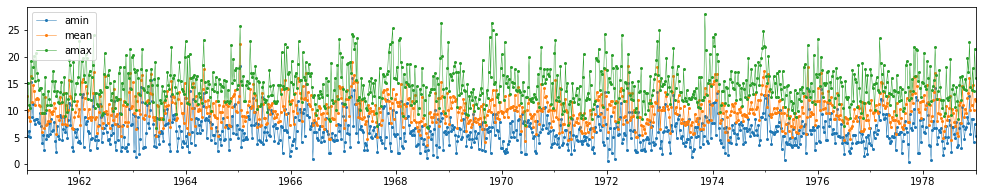

In [93]:
df_W.plot(marker='o', markersize=2, lw=0.5)
plt.gcf().set_facecolor('w')
plt.gcf().set_size_inches(17,3)